In [45]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import neighbors
%matplotlib inline

import seaborn as sns
from matplotlib import rcParams

sns.set_style('darkgrid')
rcParams['figure.figsize'] = 10,7

music = pd.DataFrame()
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]
music['bpm'] = [105, 90, 78, 75, 120, 110, 80, 100, 105, 60,
                  70, 105, 95, 70, 90, 105, 70, 75, 102, 100,
                  100, 95, 90, 80, 90, 80, 100, 105, 70, 65]

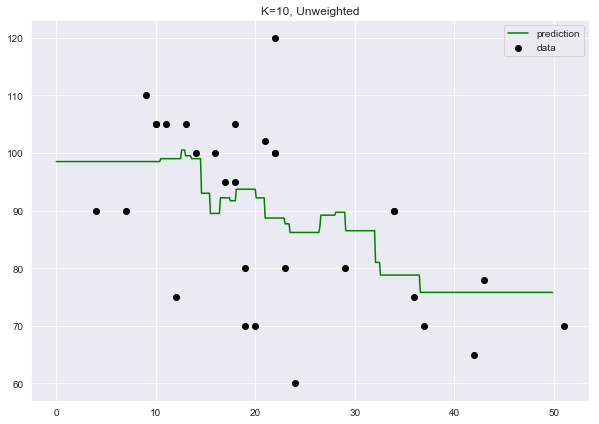

In [46]:


# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.loudness)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

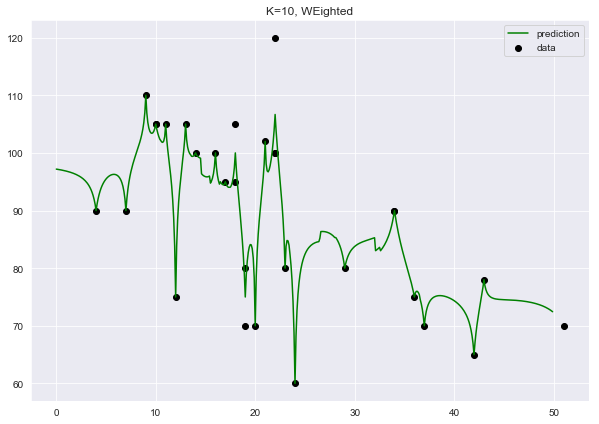

In [47]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X= pd.DataFrame(music.loudness)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 50, 0.1)[:, np.newaxis] # tell me about this syntax

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, WEighted')
plt.show()

In [48]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() *2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f' % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: -0.18 (+/-0.66)
Weighted Accuracy: 0.11 (+/- 0.94


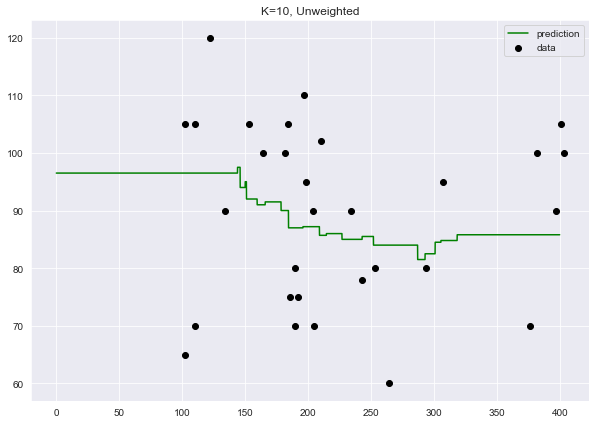

In [49]:
from sklearn import neighbors

# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music.duration)
Y = music.bpm
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 400, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

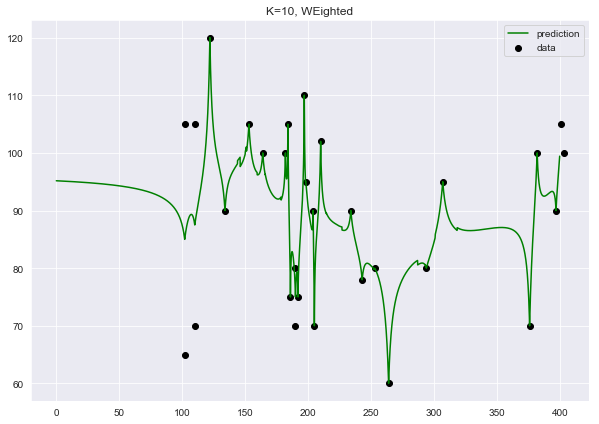

In [50]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X= pd.DataFrame(music.duration)
Y = music.bpm
knn_w.fit(X, Y)

# Set up our prediction line
T = np.arange(0, 400, 0.1)[:, np.newaxis] # tell me about this syntax

Y_ = knn_w.predict(T.reshape(-1,1))

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, WEighted')
plt.show()

In [51]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() *2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f' % (score_w.mean(), score_w.std() * 2))



Unweighted Accuracy: -0.44 (+/-0.81)
Weighted Accuracy: -0.78 (+/- 0.77


[96.5 96.5 96.5 ... 86.8 86.8 86.8]


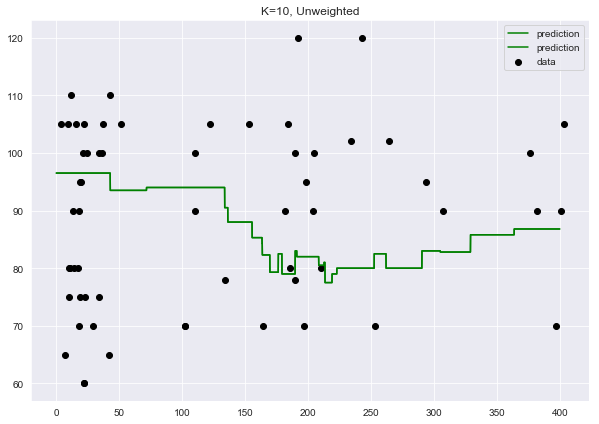

In [52]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(music[['duration', 'loudness']])
Y = music['bpm']

knn.fit(X, Y)

A = np.arange(0,400, .1)
B = np.arange(0, 400, .1)

new_df = pd.DataFrame({'A':A, 'B':B})

# Set up our prediction line.
T = np.arange(0, 400, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(new_df)

print(Y_)

_Y = pd.DataFrame([music['bpm'], music['bpm']])

plt.scatter(X, _Y, c='k', label='data')
plt.plot(new_df, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

[95.69968811 95.69793692 95.69618024 ... 86.80321915 86.80346683
 86.80371423]


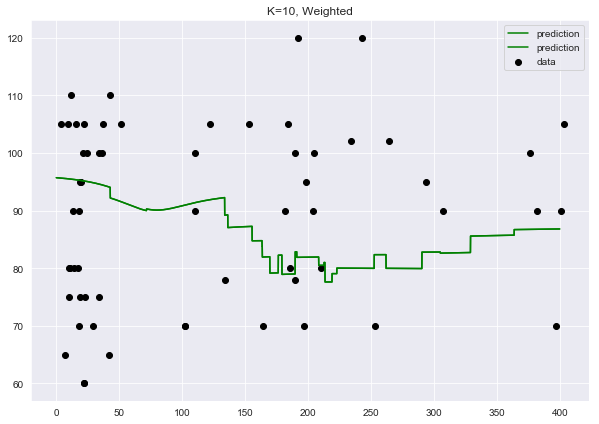

In [53]:
# Run the same model, this time with weights
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(music[['duration', 'loudness']])
Y = music['bpm']

knn_w.fit(X, Y)

A = np.arange(0,400, .1)
B = np.arange(0, 400, .1)

new_df = pd.DataFrame({'A':A, 'B':B})

# Set up our prediction line.
T = np.arange(0, 400, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn_w.predict(new_df)

print(Y_)

_Y = pd.DataFrame([music['bpm'], music['bpm']])

plt.scatter(X, _Y, c='k', label='data')
plt.plot(new_df, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()




In [54]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(knn, X, Y, cv=5)
print('Unweighted Accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() *2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print('Weighted Accuracy: %0.2f (+/- %0.2f' % (score_w.mean(), score_w.std() * 2))




Unweighted Accuracy: -0.42 (+/-0.78)
Weighted Accuracy: -0.26 (+/- 0.74


K: 1


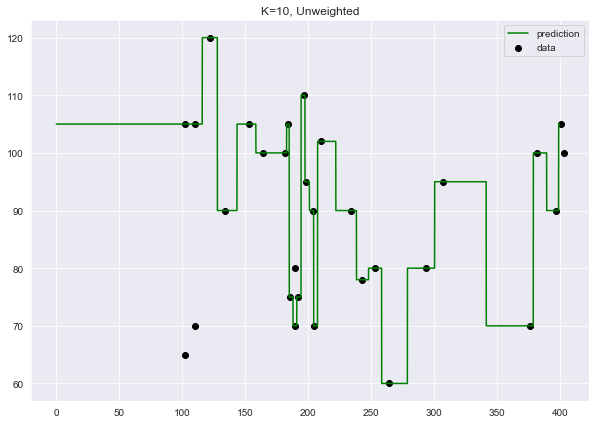

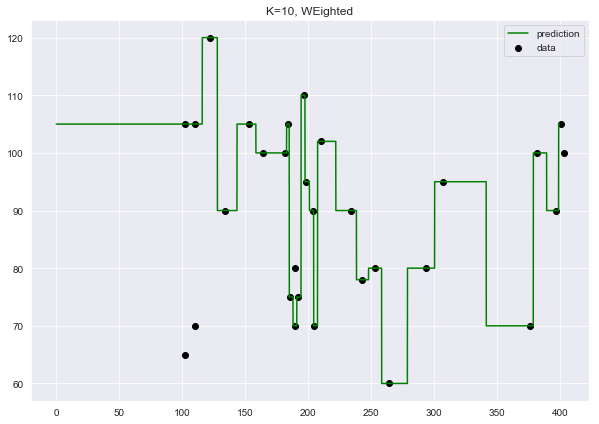

cv: 2
Unweighted Accuracy: -1.19 (+/-0.14)
Weighted Accuracy: -1.19 (+/- 0.14
cv: 3
Unweighted Accuracy: -0.51 (+/-0.89)
Weighted Accuracy: -0.51 (+/- 0.89
cv: 4
Unweighted Accuracy: -0.73 (+/-0.82)
Weighted Accuracy: -0.73 (+/- 0.82
cv: 5
Unweighted Accuracy: -1.36 (+/-2.87)
Weighted Accuracy: -1.36 (+/- 2.87
cv: 6
Unweighted Accuracy: -0.89 (+/-1.97)
Weighted Accuracy: -0.89 (+/- 1.97
cv: 7
Unweighted Accuracy: -7.85 (+/-32.64)
Weighted Accuracy: -7.85 (+/- 32.64
cv: 8
Unweighted Accuracy: -1.22 (+/-1.13)
Weighted Accuracy: -1.22 (+/- 1.13
cv: 9
Unweighted Accuracy: -46.10 (+/-251.50)
Weighted Accuracy: -46.10 (+/- 251.50
cv: 10
Unweighted Accuracy: -42.39 (+/-239.62)
Weighted Accuracy: -42.39 (+/- 239.62


K: 2


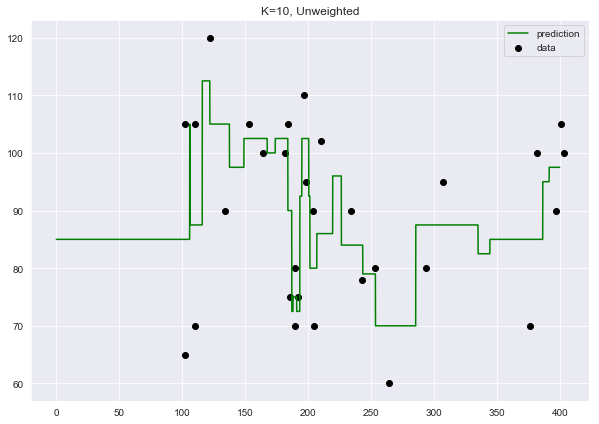

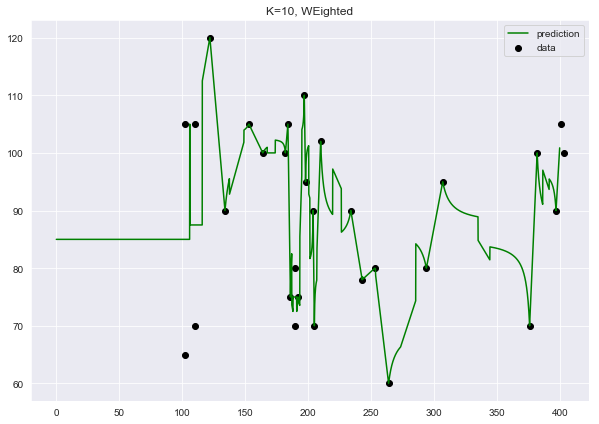

cv: 2
Unweighted Accuracy: -0.37 (+/-0.16)
Weighted Accuracy: -0.66 (+/- 0.03
cv: 3
Unweighted Accuracy: -0.36 (+/-0.41)
Weighted Accuracy: -0.46 (+/- 0.74
cv: 4
Unweighted Accuracy: -0.26 (+/-0.99)
Weighted Accuracy: -0.47 (+/- 0.74
cv: 5
Unweighted Accuracy: -0.78 (+/-1.18)
Weighted Accuracy: -1.01 (+/- 0.99
cv: 6
Unweighted Accuracy: -0.34 (+/-1.06)
Weighted Accuracy: -0.60 (+/- 1.01
cv: 7
Unweighted Accuracy: -2.99 (+/-12.12)
Weighted Accuracy: -4.09 (+/- 15.46
cv: 8
Unweighted Accuracy: -0.84 (+/-1.52)
Weighted Accuracy: -0.89 (+/- 1.23
cv: 9
Unweighted Accuracy: -21.62 (+/-115.69)
Weighted Accuracy: -23.40 (+/- 124.91
cv: 10
Unweighted Accuracy: -19.48 (+/-110.51)
Weighted Accuracy: -21.61 (+/- 118.98


K: 3


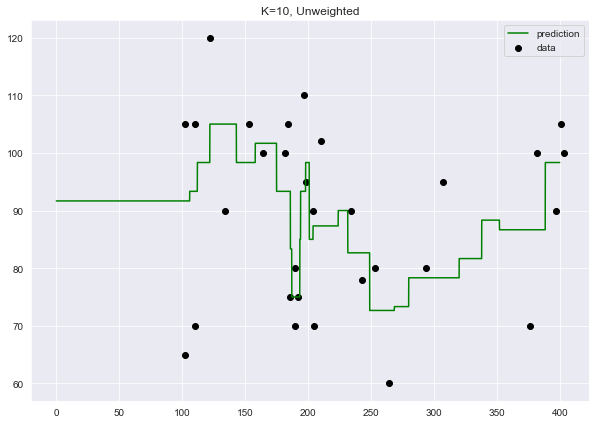

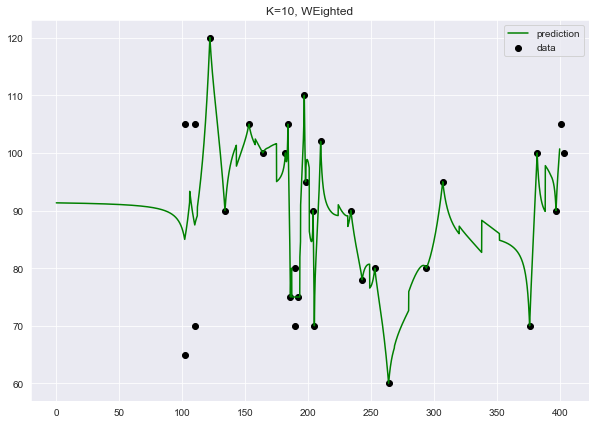

cv: 2
Unweighted Accuracy: -0.35 (+/-0.24)
Weighted Accuracy: -0.66 (+/- 0.34
cv: 3
Unweighted Accuracy: -0.37 (+/-0.23)
Weighted Accuracy: -0.44 (+/- 0.75
cv: 4
Unweighted Accuracy: -0.12 (+/-0.54)
Weighted Accuracy: -0.39 (+/- 0.93
cv: 5
Unweighted Accuracy: -0.34 (+/-0.27)
Weighted Accuracy: -0.88 (+/- 0.98
cv: 6
Unweighted Accuracy: -0.26 (+/-0.91)
Weighted Accuracy: -0.41 (+/- 1.05
cv: 7
Unweighted Accuracy: -1.04 (+/-3.56)
Weighted Accuracy: -2.63 (+/- 9.15
cv: 8
Unweighted Accuracy: -0.47 (+/-1.02)
Weighted Accuracy: -0.74 (+/- 1.45
cv: 9
Unweighted Accuracy: -13.11 (+/-70.35)
Weighted Accuracy: -18.04 (+/- 96.01
cv: 10
Unweighted Accuracy: -11.99 (+/-67.07)
Weighted Accuracy: -16.70 (+/- 91.44


K: 4


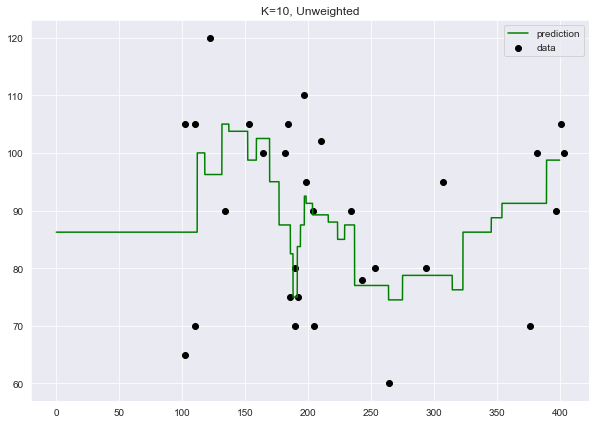

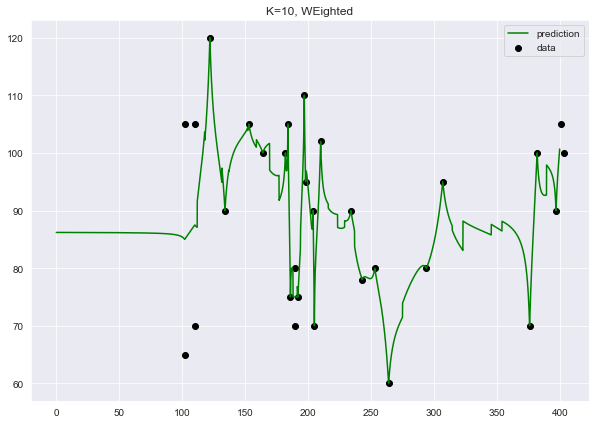

cv: 2
Unweighted Accuracy: -0.13 (+/-0.07)
Weighted Accuracy: -0.51 (+/- 0.19
cv: 3
Unweighted Accuracy: -0.42 (+/-0.46)
Weighted Accuracy: -0.43 (+/- 0.79
cv: 4
Unweighted Accuracy: -0.43 (+/-0.59)
Weighted Accuracy: -0.46 (+/- 0.87
cv: 5
Unweighted Accuracy: -0.76 (+/-0.70)
Weighted Accuracy: -0.94 (+/- 0.86
cv: 6
Unweighted Accuracy: -0.45 (+/-0.88)
Weighted Accuracy: -0.42 (+/- 1.05
cv: 7
Unweighted Accuracy: -2.50 (+/-9.85)
Weighted Accuracy: -2.51 (+/- 8.73
cv: 8
Unweighted Accuracy: -0.57 (+/-0.85)
Weighted Accuracy: -0.64 (+/- 1.49
cv: 9
Unweighted Accuracy: -9.24 (+/-47.45)
Weighted Accuracy: -11.40 (+/- 59.04
cv: 10
Unweighted Accuracy: -8.35 (+/-45.34)
Weighted Accuracy: -10.70 (+/- 56.16


K: 5


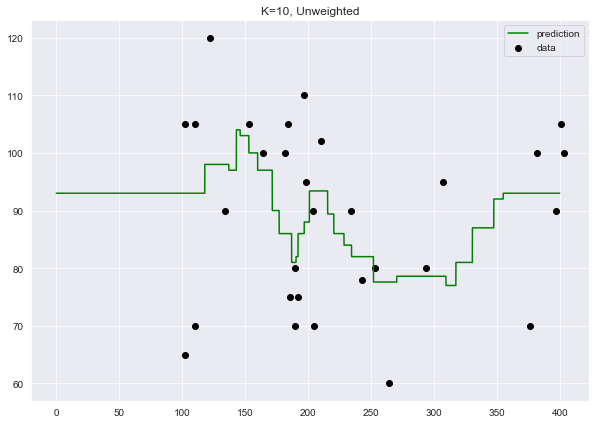

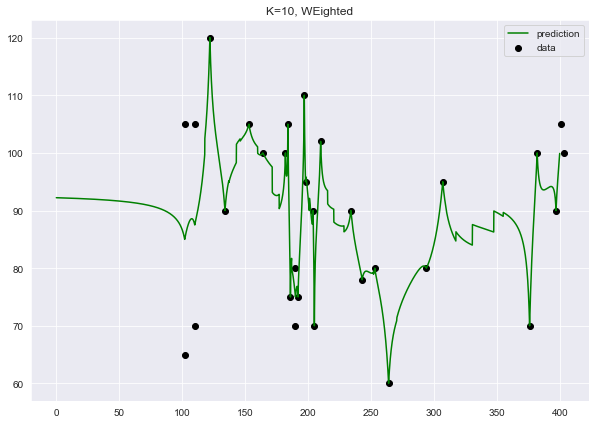

cv: 2
Unweighted Accuracy: -0.14 (+/-0.00)
Weighted Accuracy: -0.52 (+/- 0.14
cv: 3
Unweighted Accuracy: -0.34 (+/-0.36)
Weighted Accuracy: -0.40 (+/- 0.71
cv: 4
Unweighted Accuracy: -0.30 (+/-0.43)
Weighted Accuracy: -0.42 (+/- 0.85
cv: 5
Unweighted Accuracy: -0.70 (+/-1.02)
Weighted Accuracy: -0.94 (+/- 0.90
cv: 6
Unweighted Accuracy: -0.35 (+/-0.68)
Weighted Accuracy: -0.39 (+/- 1.02
cv: 7
Unweighted Accuracy: -3.65 (+/-16.05)
Weighted Accuracy: -2.78 (+/- 10.23
cv: 8
Unweighted Accuracy: -0.55 (+/-0.82)
Weighted Accuracy: -0.70 (+/- 1.47
cv: 9
Unweighted Accuracy: -14.81 (+/-79.26)
Weighted Accuracy: -14.08 (+/- 74.01
cv: 10
Unweighted Accuracy: -13.39 (+/-75.67)
Weighted Accuracy: -13.11 (+/- 70.45


K: 6


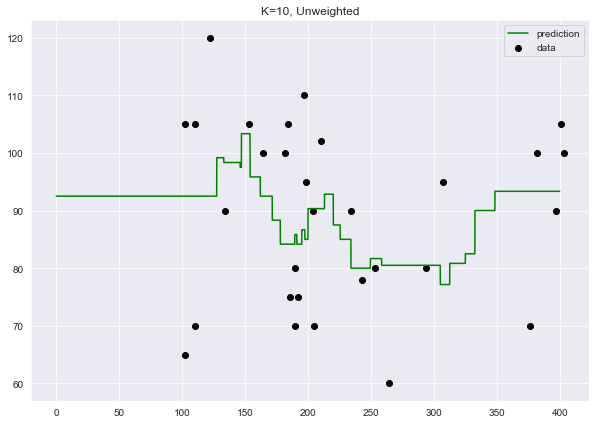

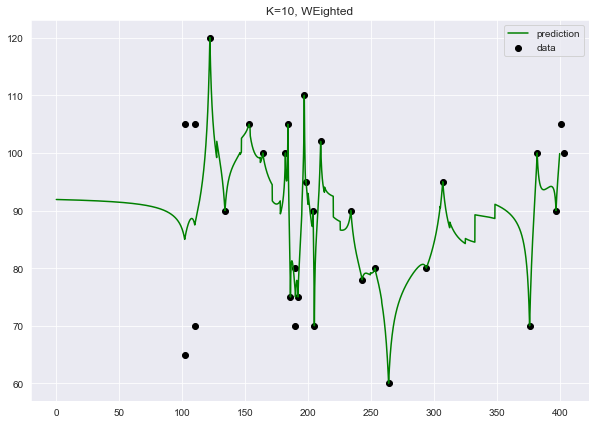

cv: 2
Unweighted Accuracy: -0.12 (+/-0.17)
Weighted Accuracy: -0.50 (+/- 0.15
cv: 3
Unweighted Accuracy: -0.36 (+/-0.41)
Weighted Accuracy: -0.40 (+/- 0.68
cv: 4
Unweighted Accuracy: -0.17 (+/-0.48)
Weighted Accuracy: -0.36 (+/- 0.86
cv: 5
Unweighted Accuracy: -0.76 (+/-1.38)
Weighted Accuracy: -0.94 (+/- 0.93
cv: 6
Unweighted Accuracy: -0.39 (+/-0.72)
Weighted Accuracy: -0.38 (+/- 0.96
cv: 7
Unweighted Accuracy: -4.10 (+/-18.85)
Weighted Accuracy: -2.81 (+/- 10.91
cv: 8
Unweighted Accuracy: -0.59 (+/-0.81)
Weighted Accuracy: -0.69 (+/- 1.41
cv: 9
Unweighted Accuracy: -21.72 (+/-118.21)
Weighted Accuracy: -16.74 (+/- 89.24
cv: 10
Unweighted Accuracy: -19.56 (+/-112.89)
Weighted Accuracy: -15.49 (+/- 84.99


K: 7


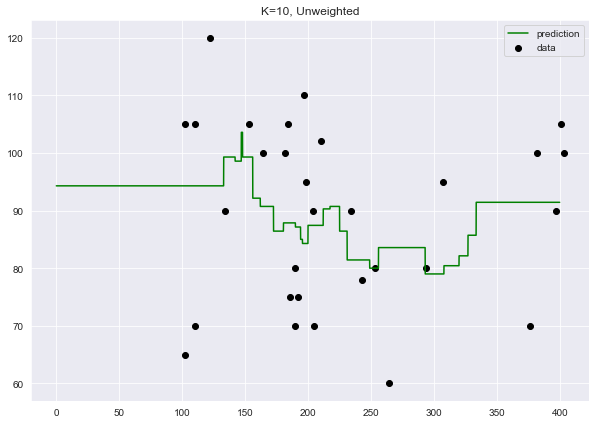

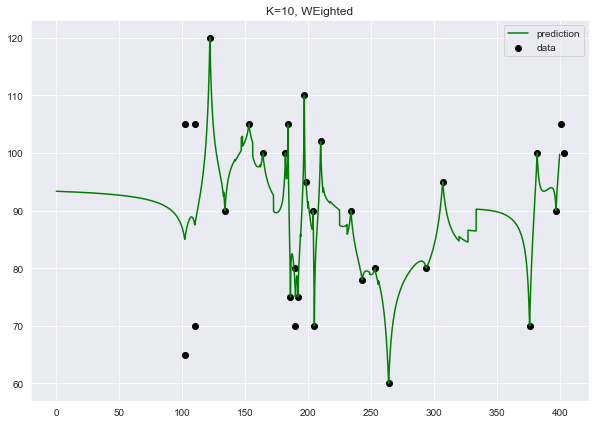

cv: 2
Unweighted Accuracy: -0.19 (+/-0.26)
Weighted Accuracy: -0.50 (+/- 0.14
cv: 3
Unweighted Accuracy: -0.34 (+/-0.35)
Weighted Accuracy: -0.38 (+/- 0.66
cv: 4
Unweighted Accuracy: -0.17 (+/-0.43)
Weighted Accuracy: -0.33 (+/- 0.87
cv: 5
Unweighted Accuracy: -0.66 (+/-1.33)
Weighted Accuracy: -0.89 (+/- 0.90
cv: 6
Unweighted Accuracy: -0.40 (+/-0.79)
Weighted Accuracy: -0.39 (+/- 0.95
cv: 7
Unweighted Accuracy: -5.35 (+/-24.63)
Weighted Accuracy: -3.05 (+/- 12.13
cv: 8
Unweighted Accuracy: -0.50 (+/-0.93)
Weighted Accuracy: -0.65 (+/- 1.43
cv: 9
Unweighted Accuracy: -28.92 (+/-160.00)
Weighted Accuracy: -18.36 (+/- 98.79
cv: 10
Unweighted Accuracy: -26.01 (+/-152.79)
Weighted Accuracy: -16.94 (+/- 94.11


K: 8


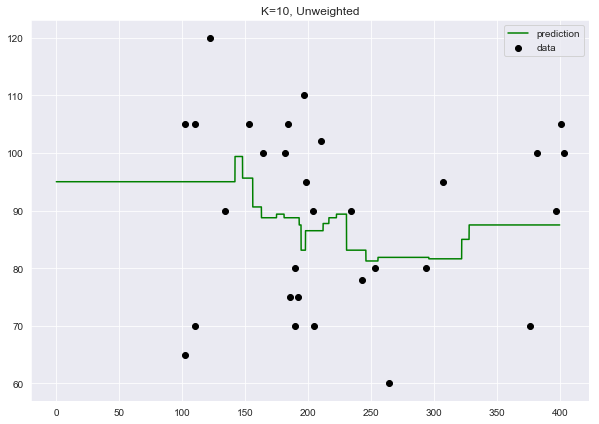

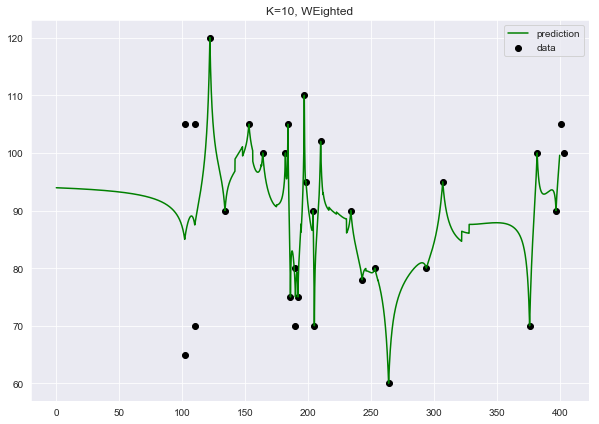

cv: 2
Unweighted Accuracy: -0.04 (+/-0.16)
Weighted Accuracy: -0.46 (+/- 0.16
cv: 3
Unweighted Accuracy: -0.26 (+/-0.25)
Weighted Accuracy: -0.37 (+/- 0.71
cv: 4
Unweighted Accuracy: -0.23 (+/-0.40)
Weighted Accuracy: -0.35 (+/- 0.85
cv: 5
Unweighted Accuracy: -0.53 (+/-0.94)
Weighted Accuracy: -0.82 (+/- 0.81
cv: 6
Unweighted Accuracy: -0.27 (+/-0.53)
Weighted Accuracy: -0.36 (+/- 0.94
cv: 7
Unweighted Accuracy: -4.76 (+/-21.99)
Weighted Accuracy: -2.93 (+/- 11.65
cv: 8
Unweighted Accuracy: -0.34 (+/-0.94)
Weighted Accuracy: -0.59 (+/- 1.48
cv: 9
Unweighted Accuracy: -31.01 (+/-172.93)
Weighted Accuracy: -19.13 (+/- 103.57
cv: 10
Unweighted Accuracy: -27.89 (+/-165.12)
Weighted Accuracy: -17.63 (+/- 98.67


K: 9


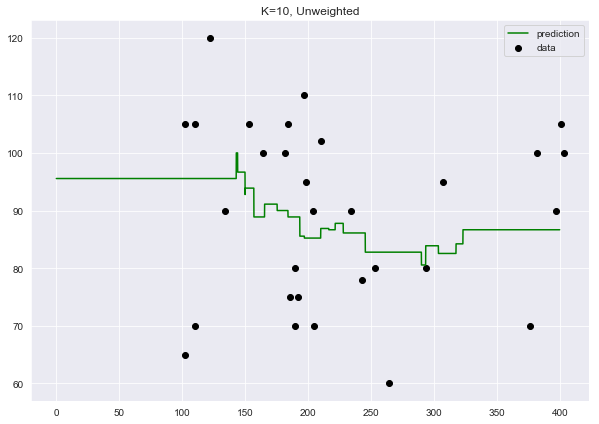

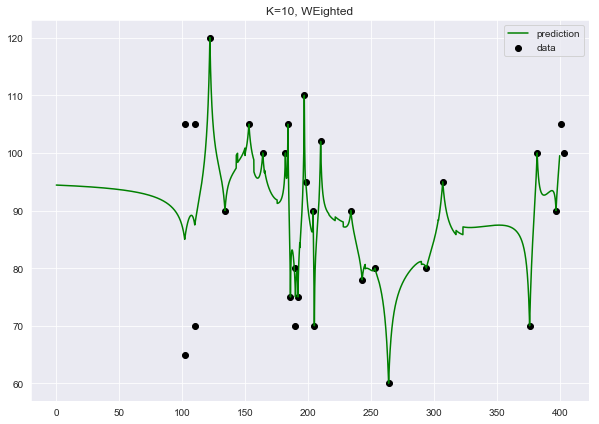

cv: 2
Unweighted Accuracy: -0.06 (+/-0.12)
Weighted Accuracy: -0.46 (+/- 0.15
cv: 3
Unweighted Accuracy: -0.16 (+/-0.16)
Weighted Accuracy: -0.35 (+/- 0.68
cv: 4
Unweighted Accuracy: -0.19 (+/-0.37)
Weighted Accuracy: -0.34 (+/- 0.86
cv: 5
Unweighted Accuracy: -0.41 (+/-0.63)
Weighted Accuracy: -0.78 (+/- 0.79
cv: 6
Unweighted Accuracy: -0.18 (+/-0.37)
Weighted Accuracy: -0.33 (+/- 0.93
cv: 7
Unweighted Accuracy: -3.93 (+/-17.87)
Weighted Accuracy: -2.55 (+/- 9.83
cv: 8
Unweighted Accuracy: -0.33 (+/-0.74)
Weighted Accuracy: -0.58 (+/- 1.51
cv: 9
Unweighted Accuracy: -28.51 (+/-158.64)
Weighted Accuracy: -17.56 (+/- 94.76
cv: 10
Unweighted Accuracy: -25.61 (+/-151.50)
Weighted Accuracy: -16.21 (+/- 90.26


K: 10


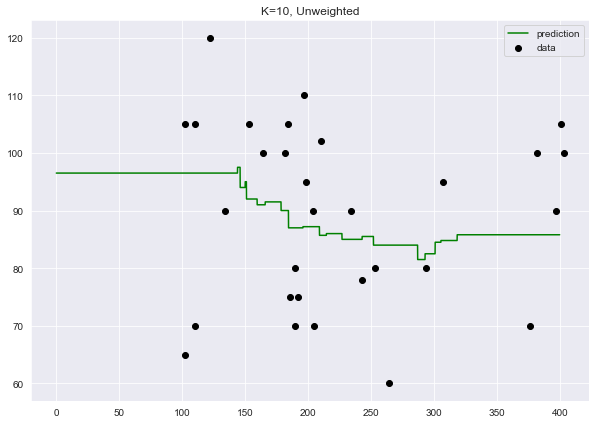

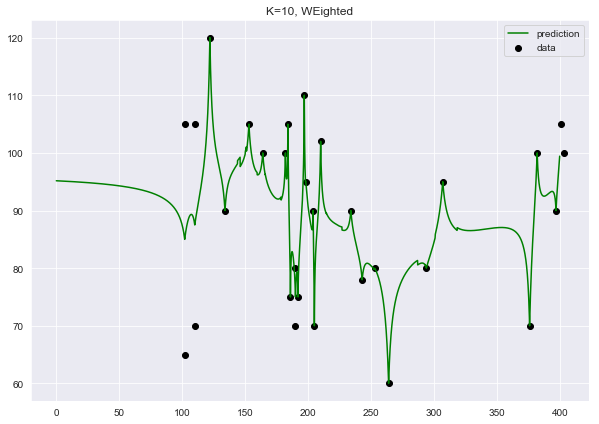

cv: 2
Unweighted Accuracy: 0.02 (+/-0.01)
Weighted Accuracy: -0.44 (+/- 0.14
cv: 3
Unweighted Accuracy: -0.10 (+/-0.19)
Weighted Accuracy: -0.35 (+/- 0.67
cv: 4
Unweighted Accuracy: -0.17 (+/-0.29)
Weighted Accuracy: -0.34 (+/- 0.84
cv: 5
Unweighted Accuracy: -0.44 (+/-0.81)
Weighted Accuracy: -0.78 (+/- 0.77
cv: 6
Unweighted Accuracy: -0.12 (+/-0.29)
Weighted Accuracy: -0.32 (+/- 0.91
cv: 7
Unweighted Accuracy: -3.48 (+/-15.99)
Weighted Accuracy: -2.37 (+/- 9.14
cv: 8
Unweighted Accuracy: -0.31 (+/-0.62)
Weighted Accuracy: -0.59 (+/- 1.46
cv: 9
Unweighted Accuracy: -24.25 (+/-135.23)
Weighted Accuracy: -15.89 (+/- 85.38
cv: 10
Unweighted Accuracy: -21.81 (+/-129.12)
Weighted Accuracy: -14.71 (+/- 81.31


K: 11


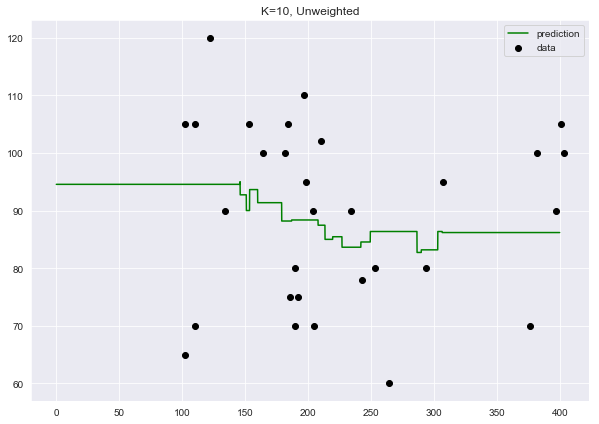

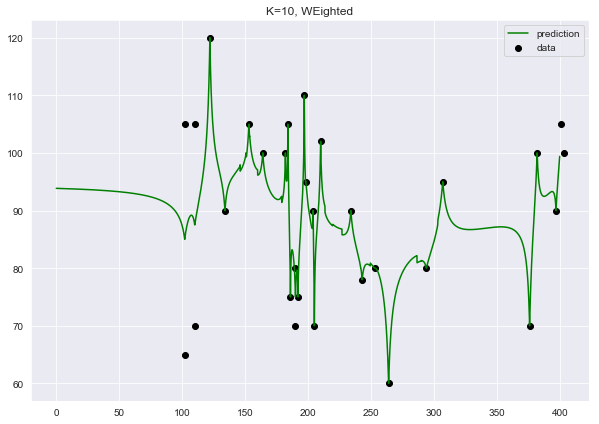

cv: 2
Unweighted Accuracy: -0.05 (+/-0.00)
Weighted Accuracy: -0.46 (+/- 0.14
cv: 3
Unweighted Accuracy: -0.11 (+/-0.12)
Weighted Accuracy: -0.34 (+/- 0.66
cv: 4
Unweighted Accuracy: -0.11 (+/-0.25)
Weighted Accuracy: -0.33 (+/- 0.83
cv: 5
Unweighted Accuracy: -0.40 (+/-0.73)
Weighted Accuracy: -0.78 (+/- 0.77
cv: 6
Unweighted Accuracy: -0.02 (+/-0.35)
Weighted Accuracy: -0.27 (+/- 0.92
cv: 7
Unweighted Accuracy: -3.88 (+/-18.14)
Weighted Accuracy: -2.48 (+/- 9.91
cv: 8
Unweighted Accuracy: -0.25 (+/-0.78)
Weighted Accuracy: -0.57 (+/- 1.49
cv: 9
Unweighted Accuracy: -24.42 (+/-136.29)
Weighted Accuracy: -15.05 (+/- 80.63
cv: 10
Unweighted Accuracy: -21.97 (+/-130.13)
Weighted Accuracy: -13.95 (+/- 76.78


K: 12


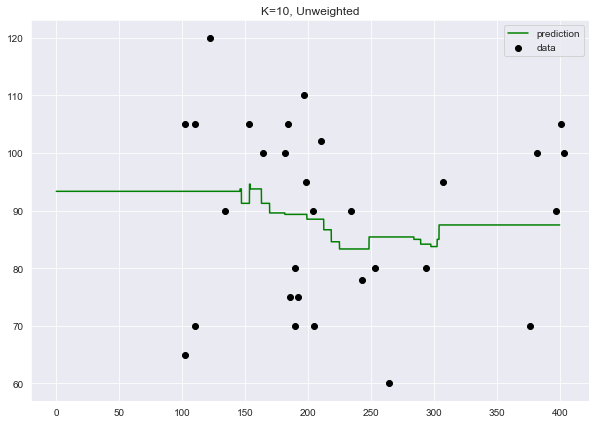

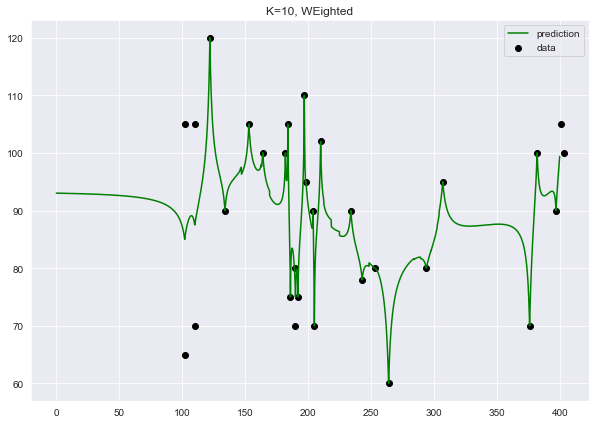

cv: 2
Unweighted Accuracy: -0.01 (+/-0.03)
Weighted Accuracy: -0.46 (+/- 0.15
cv: 3
Unweighted Accuracy: -0.08 (+/-0.05)
Weighted Accuracy: -0.34 (+/- 0.66
cv: 4
Unweighted Accuracy: -0.15 (+/-0.36)
Weighted Accuracy: -0.33 (+/- 0.84
cv: 5
Unweighted Accuracy: -0.39 (+/-0.76)
Weighted Accuracy: -0.76 (+/- 0.75
cv: 6
Unweighted Accuracy: -0.01 (+/-0.35)
Weighted Accuracy: -0.25 (+/- 0.92
cv: 7
Unweighted Accuracy: -3.58 (+/-17.00)
Weighted Accuracy: -2.36 (+/- 9.41
cv: 8
Unweighted Accuracy: -0.17 (+/-0.78)
Weighted Accuracy: -0.55 (+/- 1.51
cv: 9
Unweighted Accuracy: -26.02 (+/-146.04)
Weighted Accuracy: -16.14 (+/- 86.95
cv: 10
Unweighted Accuracy: -23.40 (+/-139.44)
Weighted Accuracy: -14.93 (+/- 82.82


K: 13


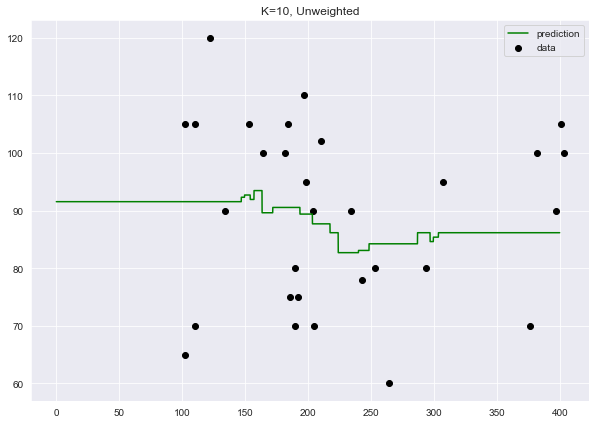

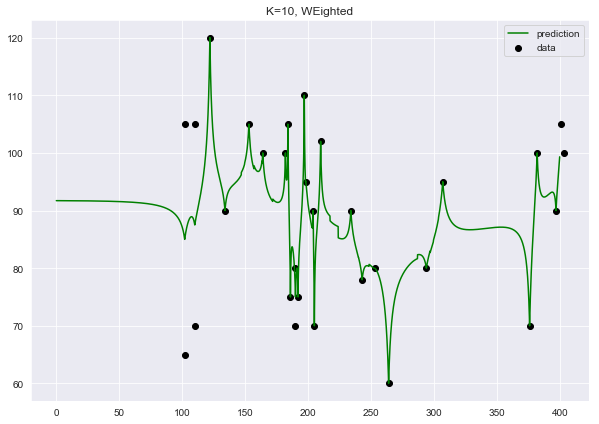

cv: 2
Unweighted Accuracy: -0.04 (+/-0.06)
Weighted Accuracy: -0.46 (+/- 0.13
cv: 3
Unweighted Accuracy: -0.13 (+/-0.12)
Weighted Accuracy: -0.34 (+/- 0.65
cv: 4
Unweighted Accuracy: -0.15 (+/-0.26)
Weighted Accuracy: -0.34 (+/- 0.83
cv: 5
Unweighted Accuracy: -0.42 (+/-0.83)
Weighted Accuracy: -0.76 (+/- 0.74
cv: 6
Unweighted Accuracy: -0.04 (+/-0.30)
Weighted Accuracy: -0.25 (+/- 0.92
cv: 7
Unweighted Accuracy: -3.62 (+/-16.94)
Weighted Accuracy: -2.43 (+/- 9.73
cv: 8
Unweighted Accuracy: -0.16 (+/-0.77)
Weighted Accuracy: -0.55 (+/- 1.52
cv: 9
Unweighted Accuracy: -23.52 (+/-132.19)
Weighted Accuracy: -15.42 (+/- 82.90
cv: 10
Unweighted Accuracy: -21.16 (+/-126.20)
Weighted Accuracy: -14.27 (+/- 78.96


K: 14


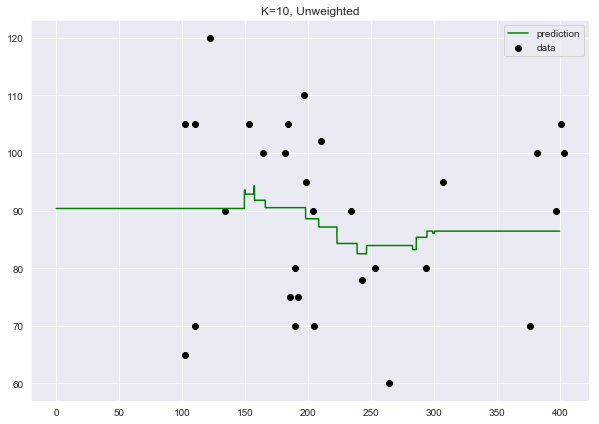

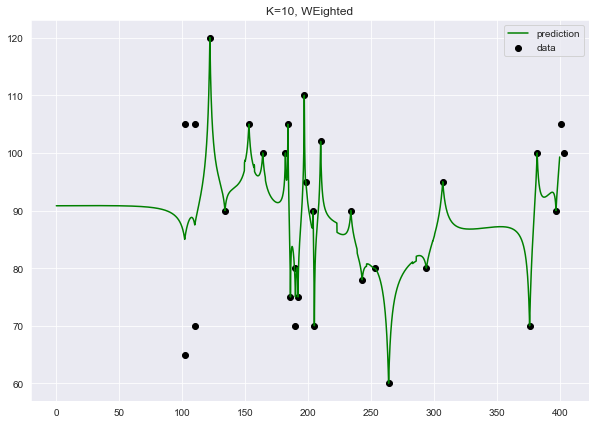

cv: 2
Unweighted Accuracy: -0.03 (+/-0.03)
Weighted Accuracy: -0.45 (+/- 0.13
cv: 3
Unweighted Accuracy: -0.08 (+/-0.10)
Weighted Accuracy: -0.34 (+/- 0.65
cv: 4
Unweighted Accuracy: -0.15 (+/-0.26)
Weighted Accuracy: -0.33 (+/- 0.83
cv: 5
Unweighted Accuracy: -0.36 (+/-0.73)
Weighted Accuracy: -0.75 (+/- 0.76
cv: 6
Unweighted Accuracy: -0.04 (+/-0.31)
Weighted Accuracy: -0.25 (+/- 0.94
cv: 7
Unweighted Accuracy: -3.64 (+/-16.66)
Weighted Accuracy: -2.40 (+/- 9.62
cv: 8
Unweighted Accuracy: -0.18 (+/-0.69)
Weighted Accuracy: -0.55 (+/- 1.51
cv: 9
Unweighted Accuracy: -25.25 (+/-141.75)
Weighted Accuracy: -16.65 (+/- 89.87
cv: 10
Unweighted Accuracy: -22.67 (+/-135.36)
Weighted Accuracy: -15.37 (+/- 85.61


K: 15


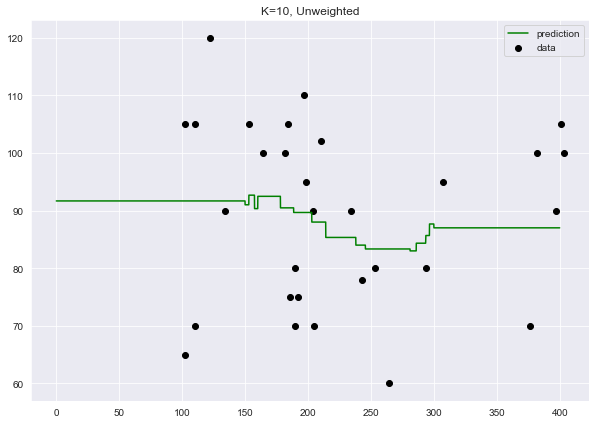

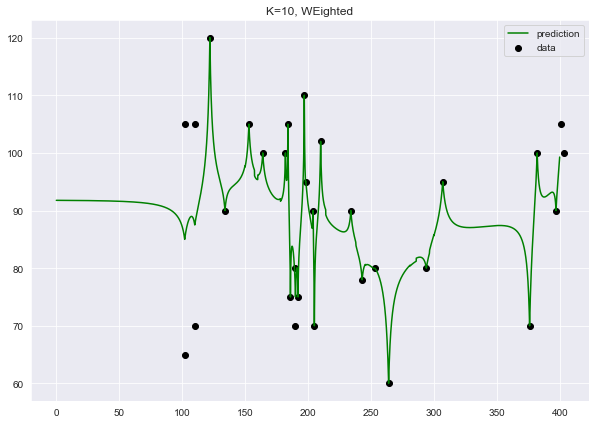

cv: 2
Unweighted Accuracy: -0.01 (+/-0.01)
Weighted Accuracy: -0.45 (+/- 0.13
cv: 3
Unweighted Accuracy: -0.06 (+/-0.11)
Weighted Accuracy: -0.34 (+/- 0.67
cv: 4
Unweighted Accuracy: -0.11 (+/-0.22)
Weighted Accuracy: -0.33 (+/- 0.83
cv: 5
Unweighted Accuracy: -0.39 (+/-0.64)
Weighted Accuracy: -0.75 (+/- 0.76
cv: 6
Unweighted Accuracy: -0.06 (+/-0.21)
Weighted Accuracy: -0.27 (+/- 0.92
cv: 7
Unweighted Accuracy: -4.09 (+/-18.93)
Weighted Accuracy: -2.44 (+/- 9.89
cv: 8
Unweighted Accuracy: -0.24 (+/-0.68)
Weighted Accuracy: -0.55 (+/- 1.50
cv: 9
Unweighted Accuracy: -23.42 (+/-130.70)
Weighted Accuracy: -15.80 (+/- 85.06
cv: 10
Unweighted Accuracy: -21.03 (+/-124.82)
Weighted Accuracy: -14.61 (+/- 81.01


K: 16


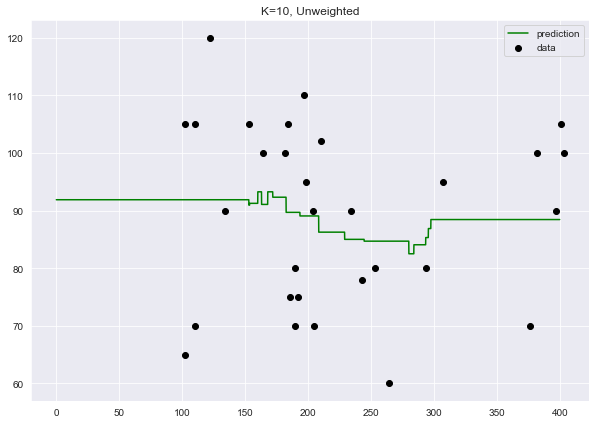

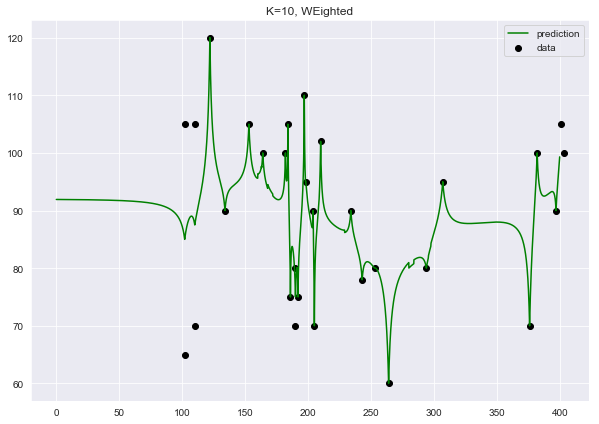

cv: 2


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 15, n_neighbors = 16

In [61]:
for i in range(1,21):
    print('K:', i)

    # Build our model.
    knn = neighbors.KNeighborsRegressor(n_neighbors=i)
    X = pd.DataFrame(music.duration)
    Y = music.bpm
    knn.fit(X, Y)

    # Set up our prediction line.
    T = np.arange(0, 400, 0.1)[:, np.newaxis]

    # Trailing underscores are a common convention for a prediction.
    Y_ = knn.predict(T)

    plt.scatter(X, Y, c='k', label='data')
    plt.plot(T, Y_, c='g', label='prediction')
    plt.legend()
    plt.title('K=10, Unweighted')
    plt.show()
    
    # Run the same model, this time with weights
    knn_w = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance')
    X= pd.DataFrame(music.duration)
    Y = music.bpm
    knn_w.fit(X, Y)

    # Set up our prediction line
    T = np.arange(0, 400, 0.1)[:, np.newaxis] # tell me about this syntax

    Y_ = knn_w.predict(T.reshape(-1,1))

    plt.scatter(X, Y, c='k', label='data')
    plt.plot(T, Y_, c='g', label='prediction')
    plt.legend()
    plt.title('K=10, WEighted')
    plt.show()
    
    for j in range(2, 11):
        print('cv:', j)
        score = cross_val_score(knn, X, Y, cv=j)
        print('Unweighted Accuracy: %0.2f (+/-%0.2f)' % (score.mean(), score.std() *2))
        score_w = cross_val_score(knn_w, X, Y, cv=j)
        print('Weighted Accuracy: %0.2f (+/- %0.2f' % (score_w.mean(), score_w.std() * 2))
        
    print()
    print()



        



